# Load libraries

In [ ]:
import os
os.chdir('../')

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import re

from src.data import make_dataset, preprocessing
from src.features import build_features
from src.models import predict_model, rnn_models, train_model
from src.visualization import visualize

In [10]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 

# Functions

In [11]:
def preprocessing(review):
    preprocessed = []
    for i in range(0, review.shape[0]):
        x = review['Review'][i]
        print(x)
        review_new = re.sub('[^a-zA-Z]', ' ', x)
        print(review_new)
        review_new = review_new.lower()
        print(review_new)
        review_new = review_new.split()
        print(review_new)

        ps = PorterStemmer()
        all_stopwords = stopwords.words('english')
        all_stopwords.remove('not')
        review_new = [ps.stem(word) for word in review_new if not word in set(all_stopwords)]
        print(review_new)
        review_new = ' '.join(review_new)
        print(review_new)
        
        preprocessed.append(review_new)     
        print("----------")
    return preprocessed

def bag_of_words(corpus, review):
    cv = CountVectorizer(max_features = 1500)
    X = cv.fit_transform(corpus).toarray()
    y = review.iloc[:, -1].values
    
    return X, y
    
def gaussiannb(X_train, y_train, X_test):
        classifier = GaussianNB()
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        return y_pred

# Load data

                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


<AxesSubplot:>

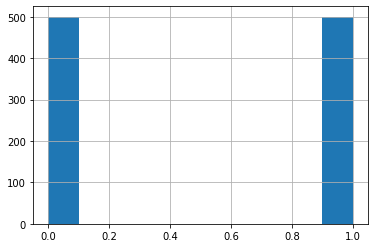

In [12]:
# load data
review = pd.read_table("data/raw/Restaurant_Reviews.tsv")
print(review.head())
review['Liked'].hist()

Wow... Loved this place.
Wow    Loved this place 
wow    loved this place 
['wow', 'loved', 'this', 'place']
['wow', 'love', 'place']
wow love place
----------
Crust is not good.
Crust is not good 
crust is not good 
['crust', 'is', 'not', 'good']
['crust', 'not', 'good']
crust not good
----------
Not tasty and the texture was just nasty.
Not tasty and the texture was just nasty 
not tasty and the texture was just nasty 
['not', 'tasty', 'and', 'the', 'texture', 'was', 'just', 'nasty']
['not', 'tasti', 'textur', 'nasti']
not tasti textur nasti
----------
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it 
stopped by during the late may bank holiday off rick steve recommendation and loved it 
['stopped', 'by', 'during', 'the', 'late', 'may', 'bank', 'holiday', 'off', 'rick', 'steve', 'recommendation', 'and', 'loved', 'it']
['stop', 'late', 'may', 'bank', 'holiday',

['watch', 'prepar', 'delici', 'food']
watch prepar delici food
----------
Both of the egg rolls were fantastic.
Both of the egg rolls were fantastic 
both of the egg rolls were fantastic 
['both', 'of', 'the', 'egg', 'rolls', 'were', 'fantastic']
['egg', 'roll', 'fantast']
egg roll fantast
----------
When my order arrived, one of the gyros was missing.
When my order arrived  one of the gyros was missing 
when my order arrived  one of the gyros was missing 
['when', 'my', 'order', 'arrived', 'one', 'of', 'the', 'gyros', 'was', 'missing']
['order', 'arriv', 'one', 'gyro', 'miss']
order arriv one gyro miss
----------
I had a salad with the wings, and some ice cream for dessert and left feeling quite satisfied.
I had a salad with the wings  and some ice cream for dessert and left feeling quite satisfied 
i had a salad with the wings  and some ice cream for dessert and left feeling quite satisfied 
['i', 'had', 'a', 'salad', 'with', 'the', 'wings', 'and', 'some', 'ice', 'cream', 'for', 'des

['servic', 'perfect', 'famili', 'atmospher', 'nice', 'see']
servic perfect famili atmospher nice see
----------
Cooked to perfection and the service was impeccable.
Cooked to perfection and the service was impeccable 
cooked to perfection and the service was impeccable 
['cooked', 'to', 'perfection', 'and', 'the', 'service', 'was', 'impeccable']
['cook', 'perfect', 'servic', 'impecc']
cook perfect servic impecc
----------
This one is simply a disappointment.
This one is simply a disappointment 
this one is simply a disappointment 
['this', 'one', 'is', 'simply', 'a', 'disappointment']
['one', 'simpli', 'disappoint']
one simpli disappoint
----------
Overall, I was very disappointed with the quality of food at Bouchon.
Overall  I was very disappointed with the quality of food at Bouchon 
overall  i was very disappointed with the quality of food at bouchon 
['overall', 'i', 'was', 'very', 'disappointed', 'with', 'the', 'quality', 'of', 'food', 'at', 'bouchon']
['overal', 'disappoint', 'qu

['waitress', 'friendli', 'happi', 'accomod', 'vegan', 'veggi', 'option']
waitress friendli happi accomod vegan veggi option
----------
OMG I felt like I had never eaten Thai food until this dish.
OMG I felt like I had never eaten Thai food until this dish 
omg i felt like i had never eaten thai food until this dish 
['omg', 'i', 'felt', 'like', 'i', 'had', 'never', 'eaten', 'thai', 'food', 'until', 'this', 'dish']
['omg', 'felt', 'like', 'never', 'eaten', 'thai', 'food', 'dish']
omg felt like never eaten thai food dish
----------
It was extremely "crumby" and pretty tasteless.
It was extremely  crumby  and pretty tasteless 
it was extremely  crumby  and pretty tasteless 
['it', 'was', 'extremely', 'crumby', 'and', 'pretty', 'tasteless']
['extrem', 'crumbi', 'pretti', 'tasteless']
extrem crumbi pretti tasteless
----------
It was a pale color instead of nice and char and has NO flavor.
It was a pale color instead of nice and char and has NO flavor 
it was a pale color instead of nice and

['could', 'eat', 'bruschetta', 'day', 'devin']
could eat bruschetta day devin
----------
Not a single employee came out to see if we were OK or even needed a water refill once they finally served us our food.
Not a single employee came out to see if we were OK or even needed a water refill once they finally served us our food 
not a single employee came out to see if we were ok or even needed a water refill once they finally served us our food 
['not', 'a', 'single', 'employee', 'came', 'out', 'to', 'see', 'if', 'we', 'were', 'ok', 'or', 'even', 'needed', 'a', 'water', 'refill', 'once', 'they', 'finally', 'served', 'us', 'our', 'food']
['not', 'singl', 'employe', 'came', 'see', 'ok', 'even', 'need', 'water', 'refil', 'final', 'serv', 'us', 'food']
not singl employe came see ok even need water refil final serv us food
----------
Lastly, the mozzarella sticks, they were the best thing we ordered.
Lastly  the mozzarella sticks  they were the best thing we ordered 
lastly  the mozzarella s

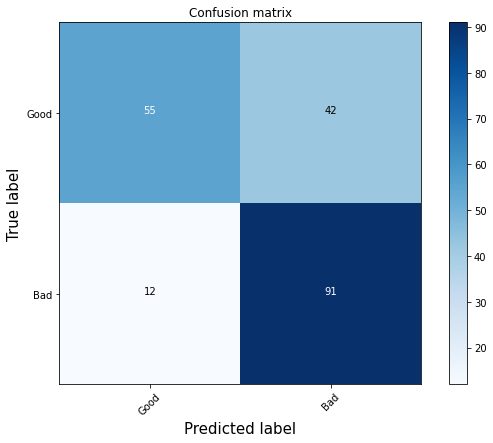

In [13]:
corpus = preprocessing(review)
X, y = bag_of_words(corpus, review)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
y_pred = gaussiannb(X_train, y_train, X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Good', 'Bad'])